1)Data Cleaning - Finding missing values


       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          100002       1         Cash loans           M            N   
1          100003       0         Cash loans           F            N   
2          100004       0    Revolving loans           M            Y   
3          100006       0         Cash loans           F            N   
4          100007       0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
49994      157871       0         Cash loans           F            N   
49995      157872       0         Cash loans           M            N   
49996      157873       0         Cash loans           M            N   
49997      157874       0         Cash loans           F            N   
49998      157875       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   Y             0          202500.0 

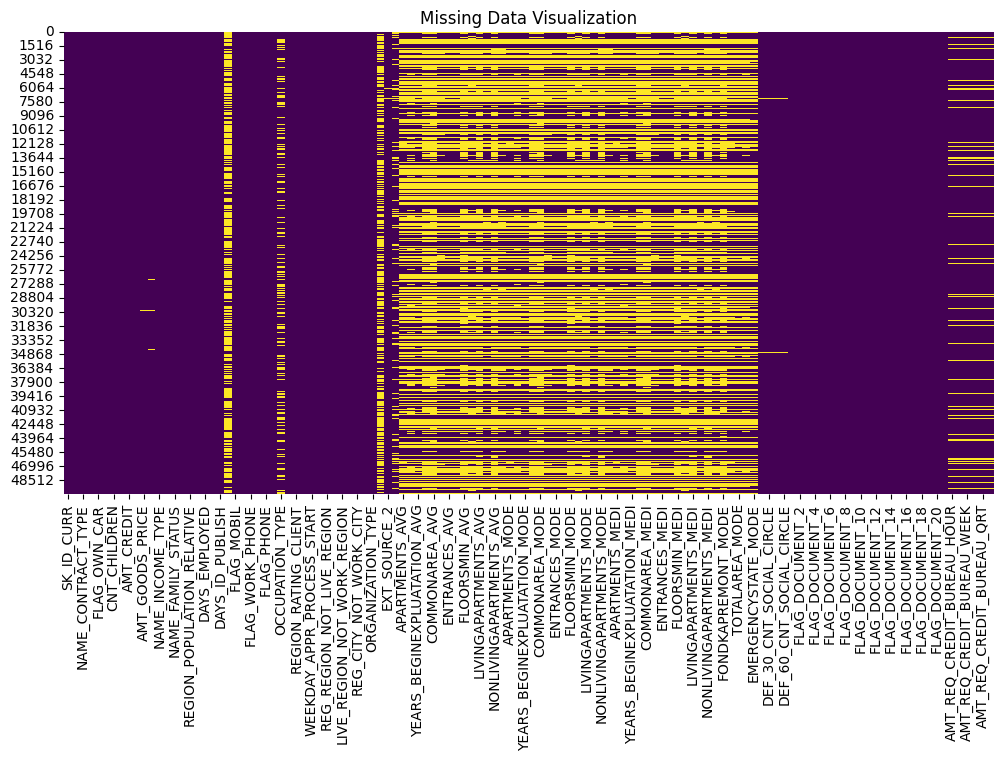

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('/content/sample_data/application_data..csv')

#prints few rows of the datset
print(df)

#identifies the null cells
missing_data = df.isnull().sum()

# Visualizes missing data with horizontal bar plot
missing_data = df.isnull()

# Visualizes missing data with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()


2)Detecting Outliers

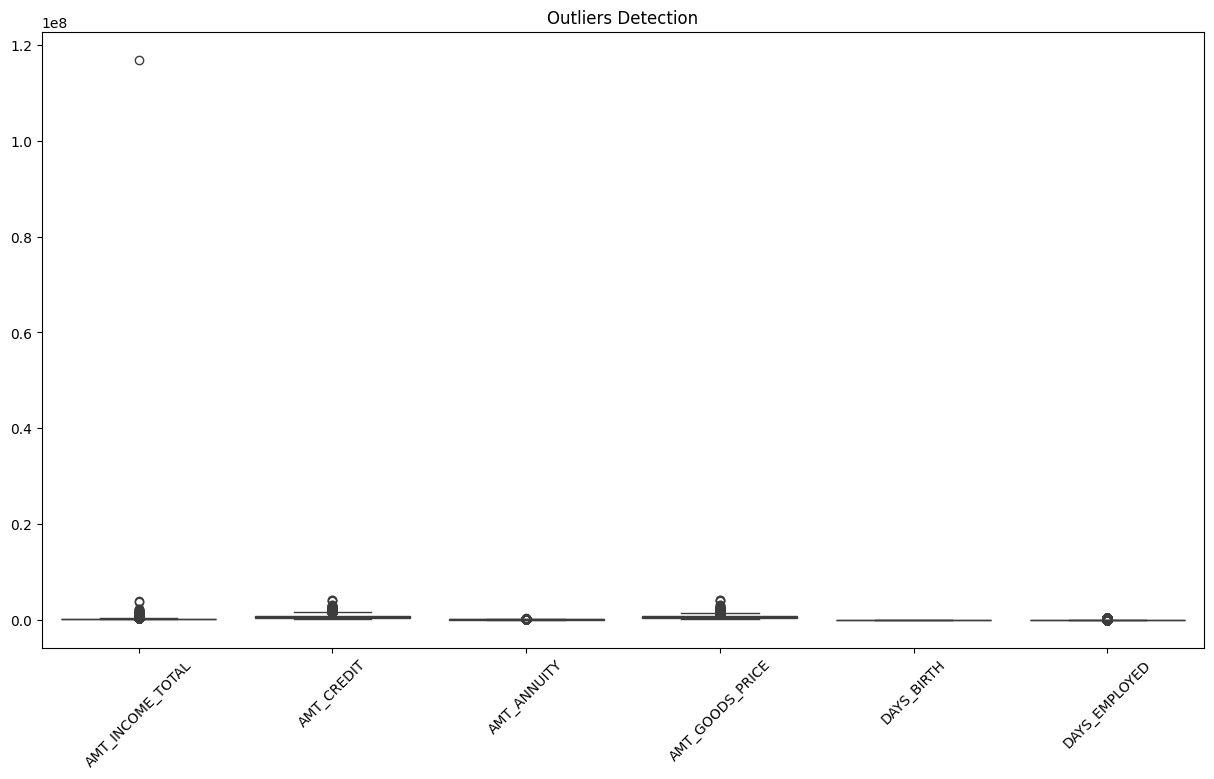

Number of outliers in each numerical column:
AMT_INCOME_TOTAL     2295
AMT_CREDIT           1063
AMT_ANNUITY          1188
AMT_GOODS_PRICE      2387
DAYS_BIRTH              0
DAYS_EMPLOYED       11712
dtype: int64


<ipython-input-5-585feddd0fee>:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  all_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


Total number of outliers in the entire dataset: 18645


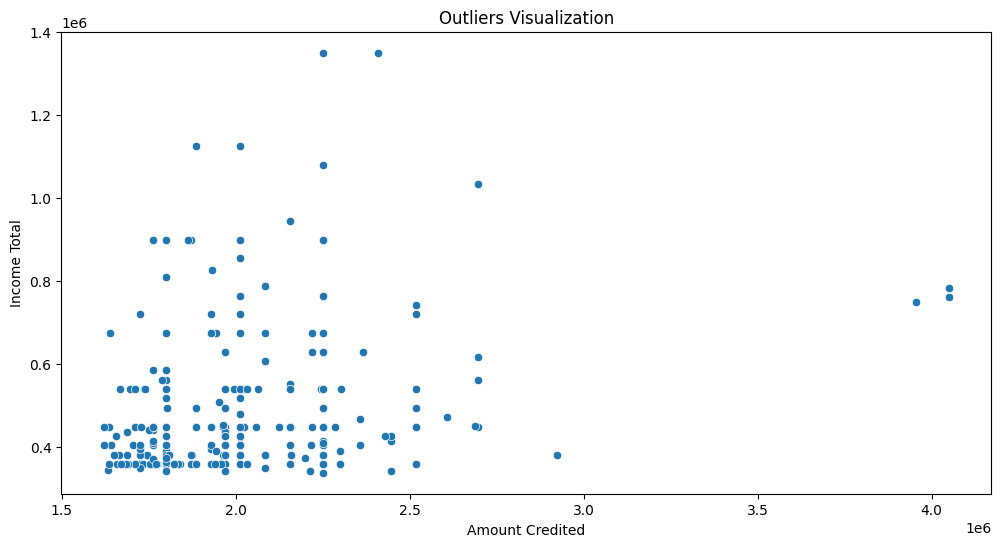

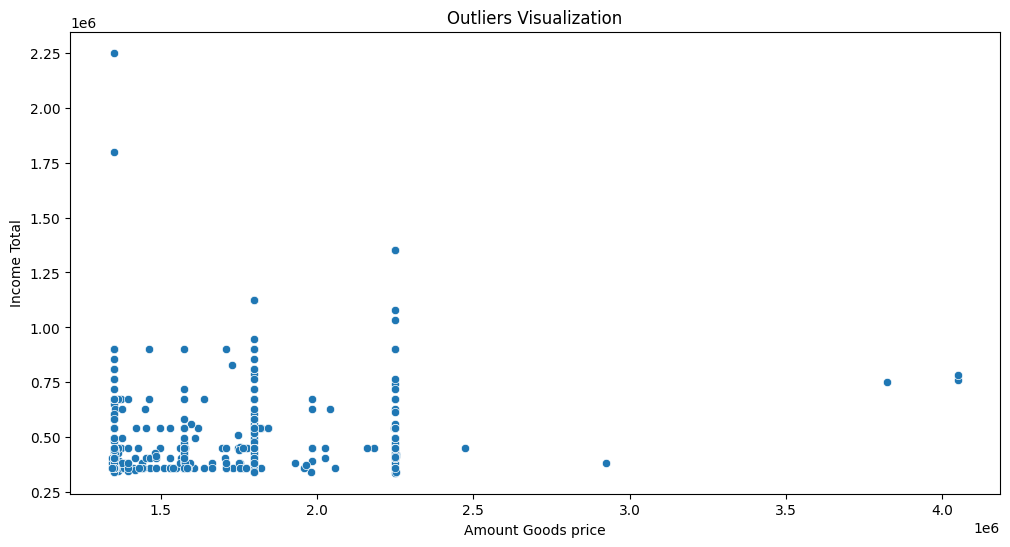

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sample_data/application_data..csv')


numerical_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Outliers Detection')
plt.xticks(rotation=45)
plt.show()

# Identifying outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) |
            (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Counts the number of outliers in each numerical column
outliers_count = outliers.sum()

print("Number of outliers in each numerical column:")
print(outliers_count)

all_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Counts the total number of outliers in the entire dataset
total_outliers_count = all_outliers.sum().sum()

print("Total number of outliers in the entire dataset:", total_outliers_count)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=df[outliers])
plt.title('Outliers Visualization')
plt.xlabel('Amount Credited')
plt.ylabel('Income Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_INCOME_TOTAL', data=df[outliers])
plt.title('Outliers Visualization')
plt.xlabel('Amount Goods price')
plt.ylabel('Income Total')
plt.show()

3)Data Imbalance


<ipython-input-8-14d57e48049f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])
<ipython-input-8-14d57e48049f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')
<ipython-input-8-14d57e48049f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

AMT_GOODS_PRICE - Class Counts: 0    49804
1      156
Name: AMT_GOODS_PRICE, dtype: int64
AMT_GOODS_PRICE - Imbalance Ratio: 0.0031322785318448317
AMT_INCOME_TOTAL - Class Counts: 0    49959
1        1
Name: AMT_INCOME_TOTAL, dtype: int64
AMT_INCOME_TOTAL - Imbalance Ratio: 2.001641345903641e-05


<ipython-input-8-14d57e48049f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])
<ipython-input-8-14d57e48049f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')


AMT_CREDIT - Class Counts: 0    49721
1      239
Name: AMT_CREDIT, dtype: int64
AMT_CREDIT - Imbalance Ratio: 0.004806822067134611
AMT_ANNUITY - Class Counts: 0    49938
1       22
Name: AMT_ANNUITY, dtype: int64
AMT_ANNUITY - Imbalance Ratio: 0.00044054627738395613


<ipython-input-8-14d57e48049f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])
<ipython-input-8-14d57e48049f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')
<ipython-input-8-14d57e48049f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

DAYS_BIRTH - Class Counts: 1    27475
0    22485
Name: DAYS_BIRTH, dtype: int64
DAYS_BIRTH - Imbalance Ratio: 1.2219257282632867
DAYS_EMPLOYED - Class Counts: 0    41040
1     8920
Name: DAYS_EMPLOYED, dtype: int64
DAYS_EMPLOYED - Imbalance Ratio: 0.21734892787524365


<ipython-input-8-14d57e48049f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])
<ipython-input-8-14d57e48049f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_variable, data=df_filtered, palette='Set2')


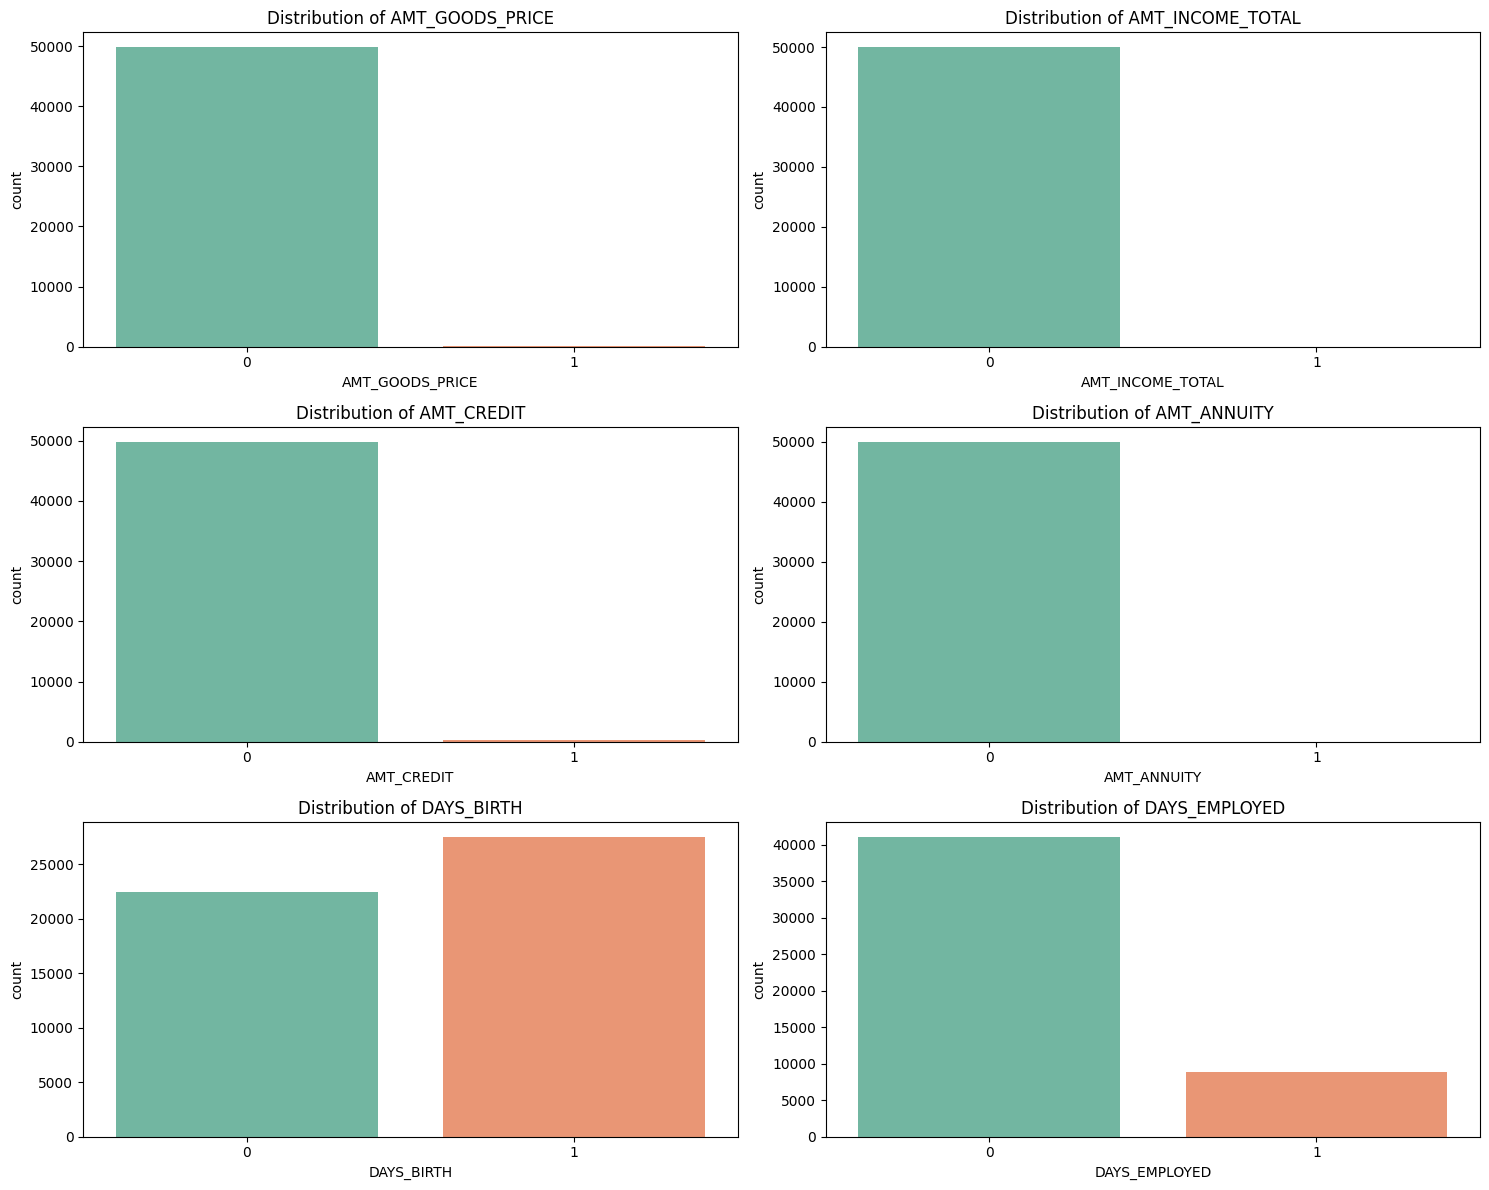

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/sample_data/application_data..csv')


numeric_variables = ['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

# Handling missing values
df_filtered = df.dropna(subset=numeric_variables)


plt.figure(figsize=(15, 12))

for i, target_variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 2, i)

    df_filtered[target_variable] = pd.cut(df_filtered[target_variable], bins=2, labels=[0, 1])

    # Calculate class counts
    class_counts = df_filtered[target_variable].value_counts()

    imbalance_ratio = class_counts[1] / class_counts[0] if 1 in class_counts.index else 0

    # Print class counts and imbalance ratio
    print(f"{target_variable} - Class Counts:", class_counts)
    print(f"{target_variable} - Imbalance Ratio:", imbalance_ratio)

    # Visualizing the distribution with a countplot
    sns.countplot(x=target_variable, data=df_filtered, palette='Set2')
    plt.title(f'Distribution of {target_variable}')

plt.tight_layout()
plt.show()



4)Univariate,Segmented Univariate and Bi-Variate Analysis

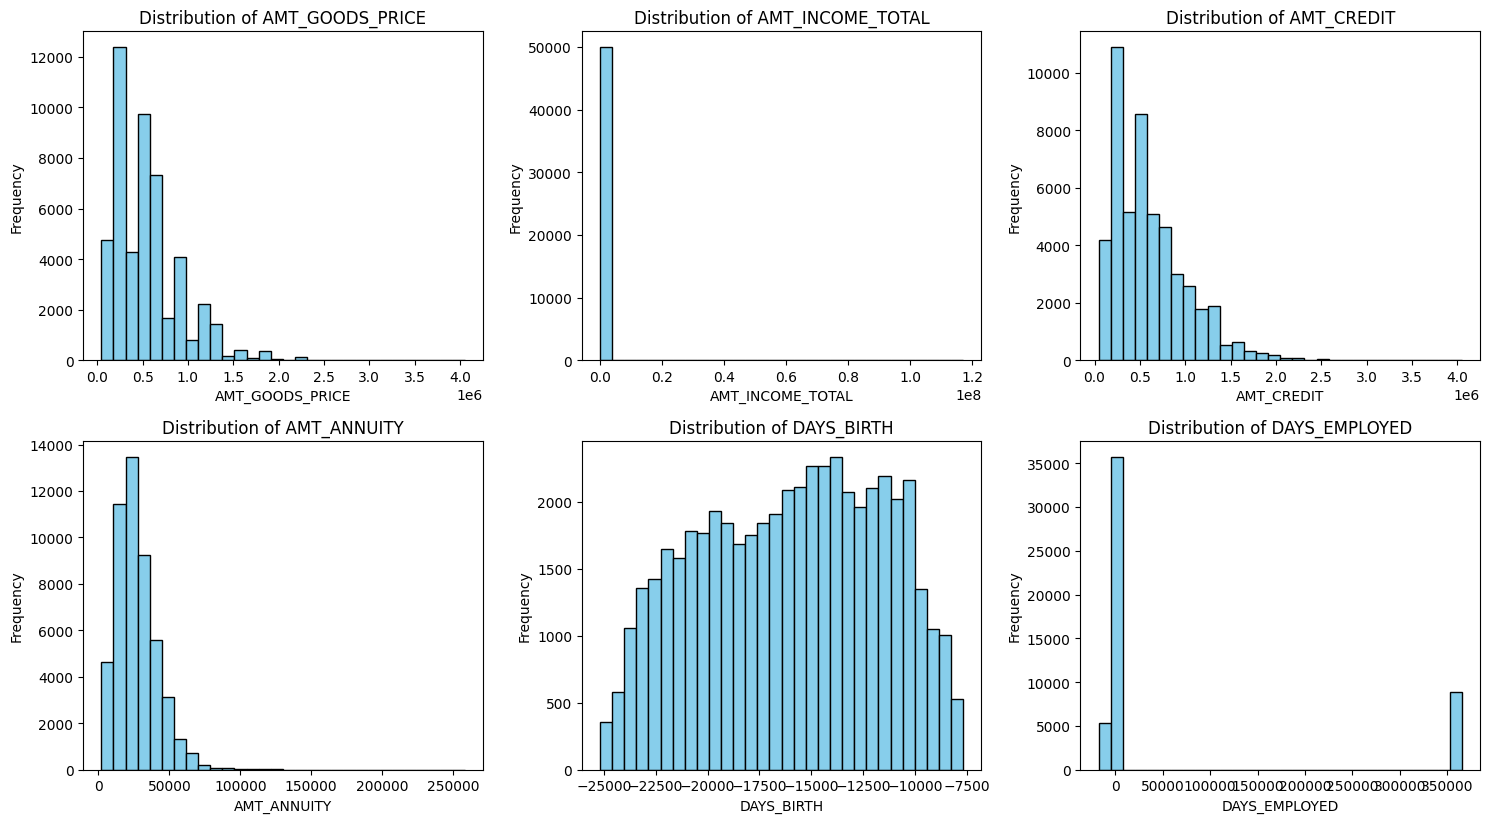

In [ ]:

#Univariate Analysis

variable_names = ['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                  'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

plt.figure(figsize=(15, 12))

# Creating subplots for each variable
for i, variable in enumerate(variable_names, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot layout based on the number of variables
    plt.hist(df[variable], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



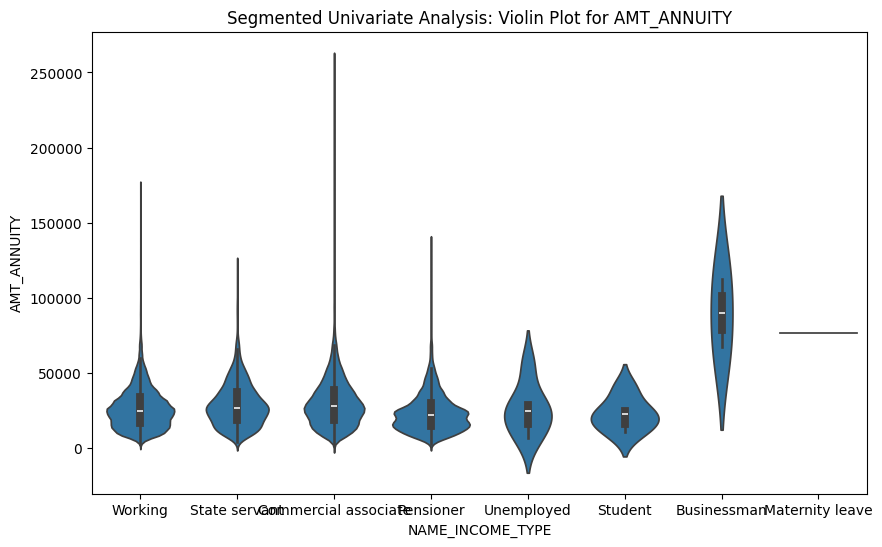

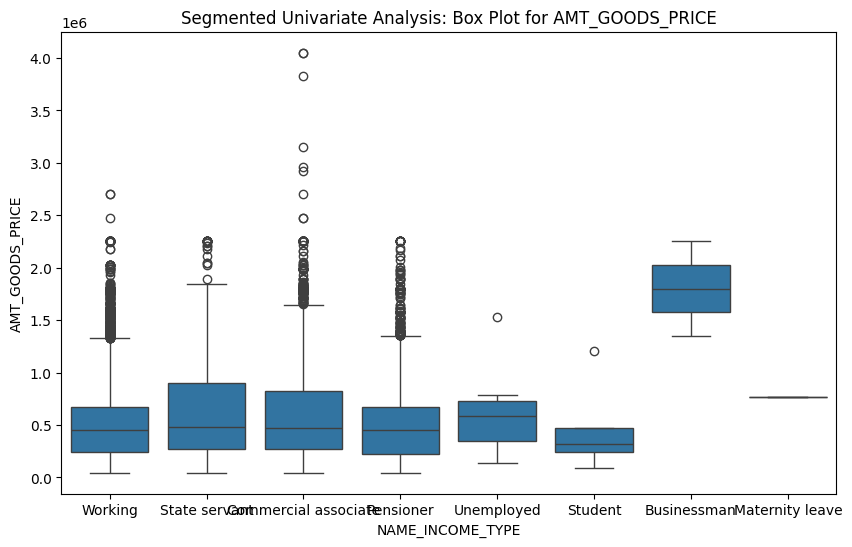

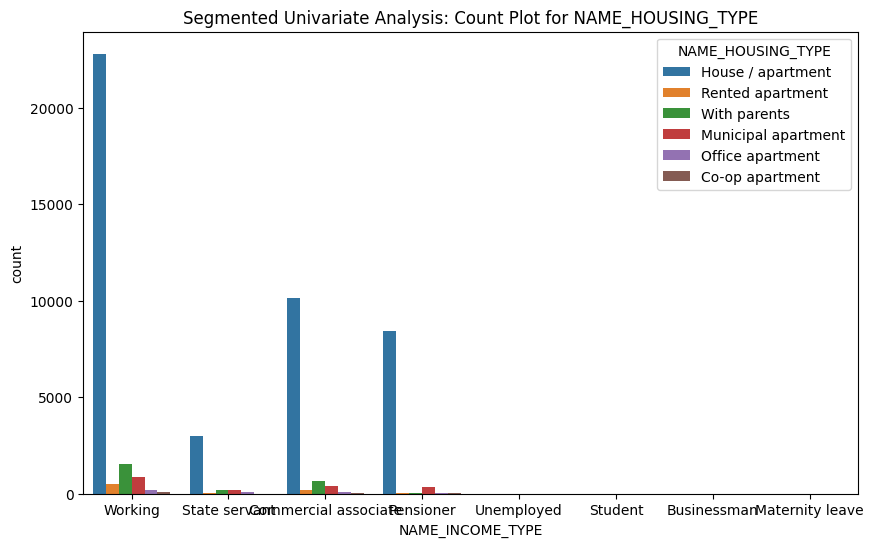

In [ ]:

#segmented univariate analysis
employee_df = df[df['NAME_INCOME_TYPE'] == 'Employee']
business_df = df[df['NAME_INCOME_TYPE'] == 'Businessman']
pensioner_df = df[df['NAME_INCOME_TYPE'] == 'Pensioner']


# Univariate analysis for AMT_ANNUITY
plt.figure(figsize=(10, 6))
sns.violinplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=df)
plt.title('Segmented Univariate Analysis: Violin Plot for AMT_ANNUITY')
plt.show()

# Univariate analysis for AMT_GOODS_PRICE
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_GOODS_PRICE', data=df)
plt.title('Segmented Univariate Analysis: Box Plot for AMT_GOODS_PRICE')
plt.show()

# Count plot for NAME_HOUSING_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_INCOME_TYPE', hue='NAME_HOUSING_TYPE', data=df)
plt.title('Segmented Univariate Analysis: Count Plot for NAME_HOUSING_TYPE')
plt.show()


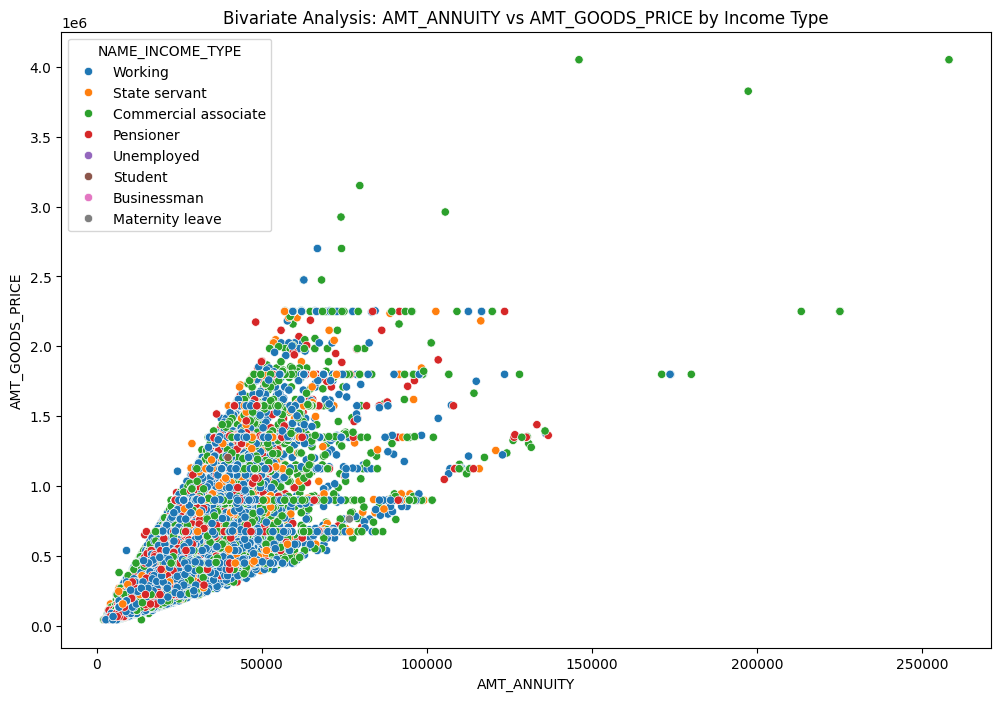

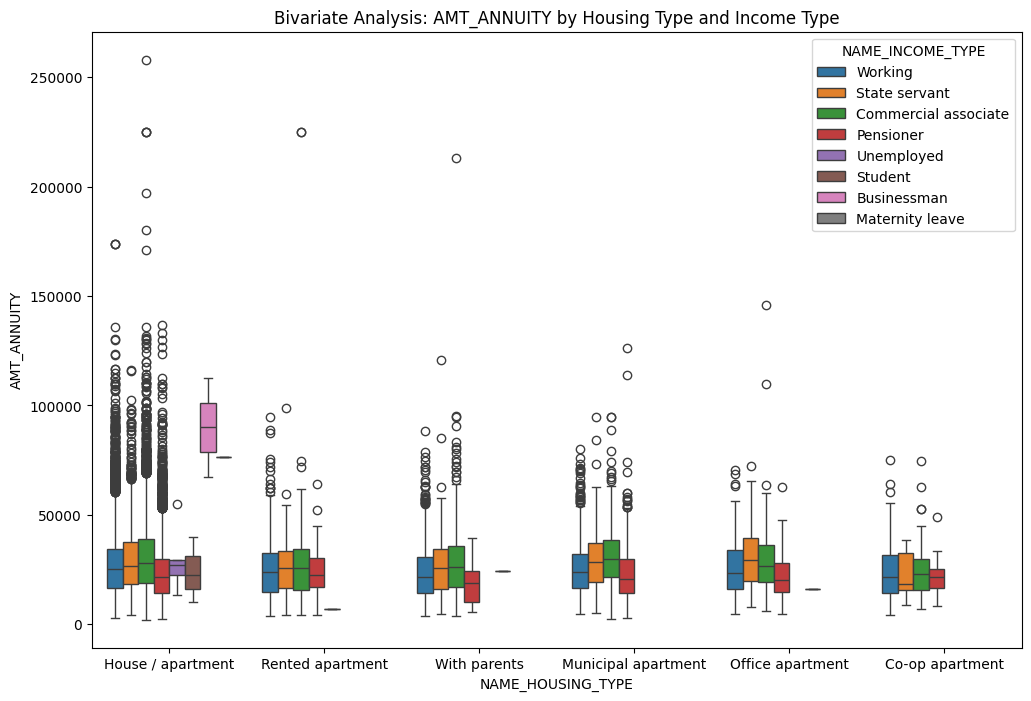

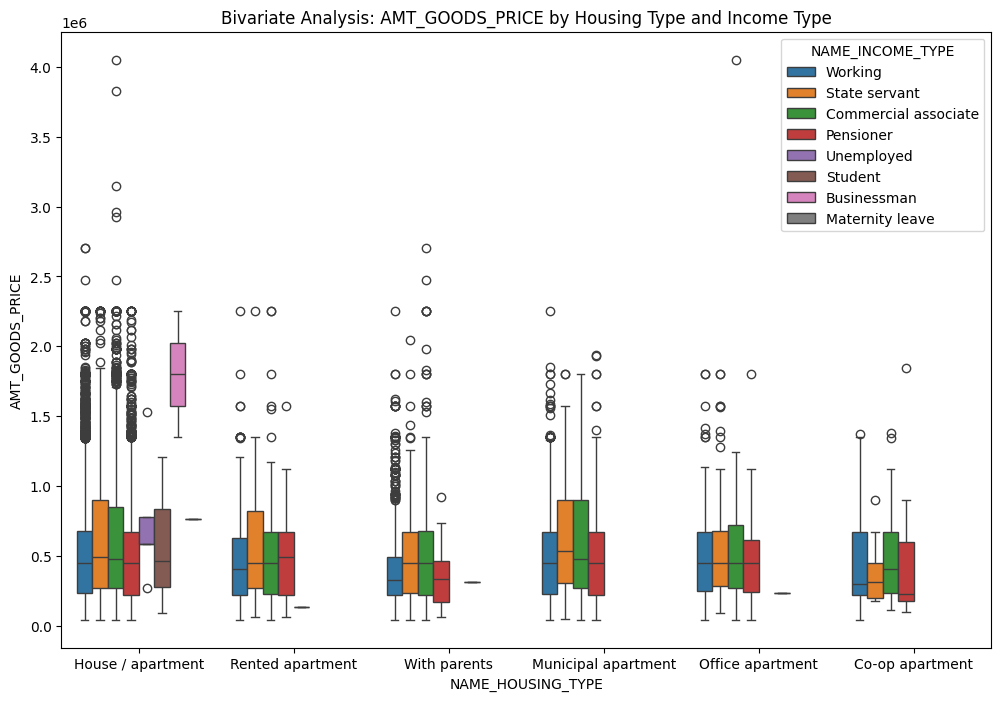

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/application_data..csv')

# Bivariate analysis for AMT_ANNUITY and AMT_GOODS_PRICE
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', hue='NAME_INCOME_TYPE', data=df)
plt.title('Bivariate Analysis: AMT_ANNUITY vs AMT_GOODS_PRICE by Income Type')
plt.show()

# Bivariate analysis for AMT_ANNUITY and NAME_HOUSING_TYPE
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_HOUSING_TYPE', y='AMT_ANNUITY', hue='NAME_INCOME_TYPE', data=df)
plt.title('Bivariate Analysis: AMT_ANNUITY by Housing Type and Income Type')
plt.show()

# Bivariate analysis for AMT_GOODS_PRICE and NAME_HOUSING_TYPE
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_HOUSING_TYPE', y='AMT_GOODS_PRICE', hue='NAME_INCOME_TYPE', data=df)
plt.title('Bivariate Analysis: AMT_GOODS_PRICE by Housing Type and Income Type')
plt.show()


5)Identify Top Correlations for Different Scenarios


In [ ]:
import pandas as pd

# Remove rows with 'NaN' values in 'OCCUPATION_TYPE'
df_filtered = df.query("OCCUPATION_TYPE != 'NaN'")

unique_groups = df_filtered['OCCUPATION_TYPE'].unique()

for occ_group in unique_groups:
    occ_group_df = df_filtered[df_filtered['OCCUPATION_TYPE'] == occ_group]

    # Calculates correlations
    # took annual amount to know the financial status about different applicants - relates to estimate how difficult it is for them to repay the loan
    correlation_yield_group = occ_group_df.corr()['AMT_ANNUITY']

    # Prints correlation values
    print(f'Correlation Matrix - {occ_group} and AMT_ANNUITY:\n{correlation_yield_group}\n')


<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


Correlation Matrix - Laborers and AMT_ANNUITY:
SK_ID_CURR                    0.003201
TARGET                       -0.012777
CNT_CHILDREN                 -0.004129
AMT_INCOME_TOTAL              0.023875
AMT_CREDIT                    0.753221
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.003438
AMT_REQ_CREDIT_BUREAU_WEEK    0.017716
AMT_REQ_CREDIT_BUREAU_MON     0.021017
AMT_REQ_CREDIT_BUREAU_QRT     0.016833
AMT_REQ_CREDIT_BUREAU_YEAR    0.008828
Name: AMT_ANNUITY, Length: 106, dtype: float64



<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


Correlation Matrix - Core staff and AMT_ANNUITY:
SK_ID_CURR                   -0.014794
TARGET                        0.013511
CNT_CHILDREN                  0.005262
AMT_INCOME_TOTAL              0.433131
AMT_CREDIT                    0.789957
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.027403
AMT_REQ_CREDIT_BUREAU_WEEK    0.030318
AMT_REQ_CREDIT_BUREAU_MON     0.033208
AMT_REQ_CREDIT_BUREAU_QRT    -0.002064
AMT_REQ_CREDIT_BUREAU_YEAR   -0.016339
Name: AMT_ANNUITY, Length: 106, dtype: float64

Correlation Matrix - Accountants and AMT_ANNUITY:
SK_ID_CURR                   -0.059558
TARGET                       -0.008598
CNT_CHILDREN                  0.008545
AMT_INCOME_TOTAL              0.396698
AMT_CREDIT                    0.736057
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.010710
AMT_REQ_CREDIT_BUREAU_WEEK   -0.002300
AMT_REQ_CREDIT_BUREAU_MON     0.019106
AMT_REQ_CREDIT_BUREAU_QRT     0.032223
AMT_REQ_CREDIT_BUREAU_YEAR   -0.03

<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


Correlation Matrix - Managers and AMT_ANNUITY:
SK_ID_CURR                   -0.017042
TARGET                       -0.035248
CNT_CHILDREN                 -0.029308
AMT_INCOME_TOTAL              0.397768
AMT_CREDIT                    0.711916
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.030618
AMT_REQ_CREDIT_BUREAU_WEEK    0.009035
AMT_REQ_CREDIT_BUREAU_MON     0.037532
AMT_REQ_CREDIT_BUREAU_QRT    -0.010326
AMT_REQ_CREDIT_BUREAU_YEAR   -0.007587
Name: AMT_ANNUITY, Length: 106, dtype: float64

Correlation Matrix - nan and AMT_ANNUITY:
SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
                              ..
AMT_REQ_CREDIT_BUREAU_DAY    NaN
AMT_REQ_CREDIT_BUREAU_WEEK   NaN
AMT_REQ_CREDIT_BUREAU_MON    NaN
AMT_REQ_CREDIT_BUREAU_QRT    NaN
AMT_REQ_CREDIT_BUREAU_YEAR   NaN
Name: AMT_ANNUITY, Length: 106, dtype: float64

Correlation Matrix - Dr

<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']


Correlation Matrix - Sales staff and AMT_ANNUITY:
SK_ID_CURR                    0.006498
TARGET                        0.000437
CNT_CHILDREN                 -0.005750
AMT_INCOME_TOTAL              0.409889
AMT_CREDIT                    0.783615
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.013501
AMT_REQ_CREDIT_BUREAU_WEEK    0.011267
AMT_REQ_CREDIT_BUREAU_MON     0.045223
AMT_REQ_CREDIT_BUREAU_QRT     0.023515
AMT_REQ_CREDIT_BUREAU_YEAR    0.029407
Name: AMT_ANNUITY, Length: 106, dtype: float64

Correlation Matrix - Cleaning staff and AMT_ANNUITY:
SK_ID_CURR                    0.007586
TARGET                       -0.011615
CNT_CHILDREN                 -0.004941
AMT_INCOME_TOTAL              0.452242
AMT_CREDIT                    0.817664
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.009424
AMT_REQ_CREDIT_BUREAU_WEEK    0.032503
AMT_REQ_CREDIT_BUREAU_MON     0.063897
AMT_REQ_CREDIT_BUREAU_QRT    -0.014966
AMT_REQ_CREDIT_BUREAU_YEAR    

<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarn

Correlation Matrix - Security staff and AMT_ANNUITY:
SK_ID_CURR                   -0.021741
TARGET                       -0.013597
CNT_CHILDREN                  0.024390
AMT_INCOME_TOTAL              0.439127
AMT_CREDIT                    0.747986
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.026698
AMT_REQ_CREDIT_BUREAU_WEEK    0.017563
AMT_REQ_CREDIT_BUREAU_MON    -0.024015
AMT_REQ_CREDIT_BUREAU_QRT     0.011658
AMT_REQ_CREDIT_BUREAU_YEAR   -0.012796
Name: AMT_ANNUITY, Length: 106, dtype: float64

Correlation Matrix - High skill tech staff and AMT_ANNUITY:
SK_ID_CURR                    0.005158
TARGET                       -0.004524
CNT_CHILDREN                 -0.021859
AMT_INCOME_TOTAL              0.470729
AMT_CREDIT                    0.760594
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.037655
AMT_REQ_CREDIT_BUREAU_WEEK    0.027353
AMT_REQ_CREDIT_BUREAU_MON     0.051793
AMT_REQ_CREDIT_BUREAU_QRT     0.034175
AMT_REQ_CREDIT_BUREA

<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_yield_group = yield_group_df.corr()['AMT_ANNUITY']
<ipython-input-13-aea49d1d8a04>:15: FutureWarn

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/sample_data/application_data..csv')

df_filtered = df.dropna(subset=['OCCUPATION_TYPE'])

# Unique occupations in the filtered dataset
unique_occupations = df_filtered['OCCUPATION_TYPE'].unique()

for occupation in unique_occupations:
    occupation_df = df_filtered[df_filtered['OCCUPATION_TYPE'] == occupation]

    # Calculates correlations
    correlation_occupation = occupation_df.corr()['AMT_ANNUITY']

    # Visualizing
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_occupation.to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f'Correlation Matrix - {occupation} and AMT_ANNUITY')
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')